In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SimpleRNN
from keras.datasets import imdb
from sklearn.metrics import confusion_matrix



2024-04-26 21:18:21.042048: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 21:18:21.042134: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 21:18:21.175578: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Hyper-Parameters
max_features = 5000
no_classes = 1
max_length = 100
batch_size = 64
embedding_size = 64

# Load IMDB Data from Keras datasets
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print('Data loaded successfully.')
print('# Train Data = ', len(x_train))
print('# Test Data = ', len(x_test))


# Data Preprocessing
print('Preprocessing Data..')
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)



17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Data loaded successfully.
# Train Data =  25000
# Test Data =  25000
Preprocessing Data..


In [41]:
RNN_model = Sequential()
# Add Embedding layer
RNN_model.add(Embedding(max_features, embedding_size, input_length=max_length))
RNN_model.add(Dropout(0.5))
# Add Simple RNN layer
RNN_model.add(SimpleRNN(25))
# Add Dense Hidden Layer
RNN_model.add(Dense(250, activation='relu'))
RNN_model.add(Dropout(0.5))
# Output Layer 
RNN_model.add(Dense(no_classes, activation='sigmoid'))
RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
RNN_model.fit(x_train, y_train, batch_size=batch_size, verbose=2, epochs=5, validation_data=(x_test, y_test))



Epoch 1/5
782/782 - 20s - 25ms/step - accuracy: 0.6696 - loss: 0.5739 - val_accuracy: 0.8174 - val_loss: 0.4081
Epoch 2/5
782/782 - 9s - 12ms/step - accuracy: 0.8303 - loss: 0.3929 - val_accuracy: 0.8246 - val_loss: 0.4255
Epoch 3/5
782/782 - 9s - 12ms/step - accuracy: 0.8635 - loss: 0.3270 - val_accuracy: 0.8307 - val_loss: 0.3806
Epoch 4/5
782/782 - 9s - 12ms/step - accuracy: 0.8784 - loss: 0.3013 - val_accuracy: 0.8346 - val_loss: 0.3983
Epoch 5/5
782/782 - 9s - 12ms/step - accuracy: 0.8901 - loss: 0.2745 - val_accuracy: 0.8272 - val_loss: 0.4707


In [43]:
loss, accuracy = RNN_model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8270 - loss: 0.4775
Test Accuracy: 0.8271600008010864


In [44]:
# Evaluate model and print confusion matrix
print('Evaluating the model..')
y_pred = RNN_model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype("int32")  # Convert probabilities to binary predictions
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

Evaluating the model..
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Confusion Matrix:
[[ 9915  2585]
 [ 1736 10764]]


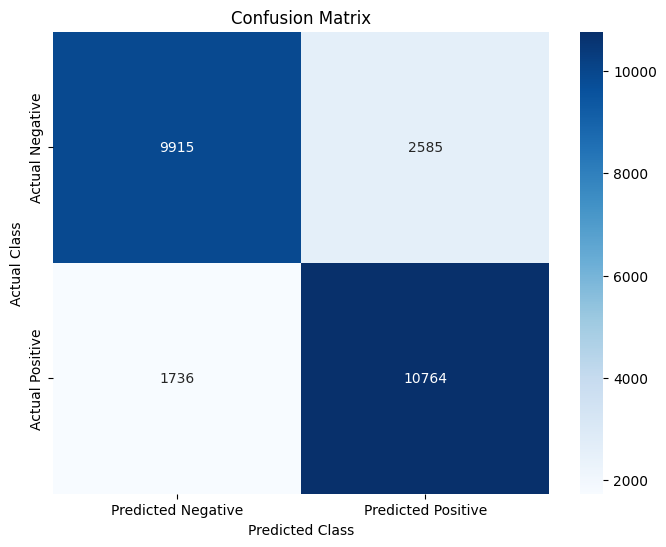

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix')
plt.show()